# Show me what you mean - Accompanying Notebook

In [511]:
from math import pi

import altair as alt
import pandas as pd

from bokeh.io import output_notebook, show
from bokeh.models import Label
from bokeh.plotting import figure, ColumnDataSource
from bokeh.transform import cumsum

from vega_datasets import data

In [512]:
output_notebook()

Loading BokehJS ...

In [513]:
source = data.anscombe()

# Anscombe's quartet

Anscombe's quartet illustrates the importance of visulizing the data. Data sets that have same statistics may depict completely different patterns.

In [514]:
# Separate each element of quartet into its data set
df_1 = source.loc[source.Series == 'I']
df_2 = source.loc[source.Series == 'II']
df_3 = source.loc[source.Series == 'III']
df_4 = source.loc[source.Series == 'IV']

df_list = [df_1, df_2, df_3, df_4]

In [515]:
color_list = ['#2988DF', '#5CCB2B', '#6F51C7', '#C0387F']

In [516]:
def anscombe_chart(source, color):
    plot = alt.Chart(source, width=250, height=250)\
                .mark_circle(color=color, size=100)\
                .encode(alt.X('X', scale=alt.Scale(zero=False)),
                        alt.Y('Y', scale=alt.Scale(zero=False)),)
    return plot

In [517]:
charts = [anscombe_chart(df, color_list[i]) for i, df in enumerate(df_list)]

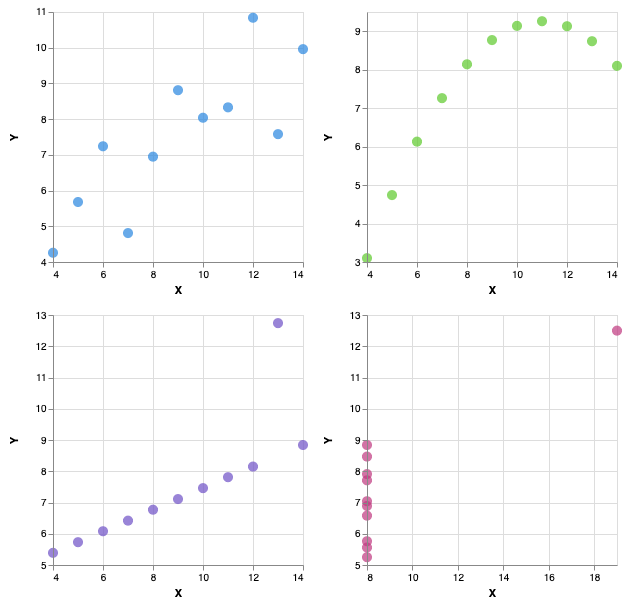

In [518]:
(charts[0] | charts[1]) & (charts[2] | charts[3])

## Quartet as means

We could have always completely missed the point of Anscombe had we chosen inappropriate visualizations like this one. Below we are only visualizing the means of each of the variables. With this information we might also conclude that relationships are the same.

In [519]:
anscombe_means = source.groupby('Series', as_index=False).mean()

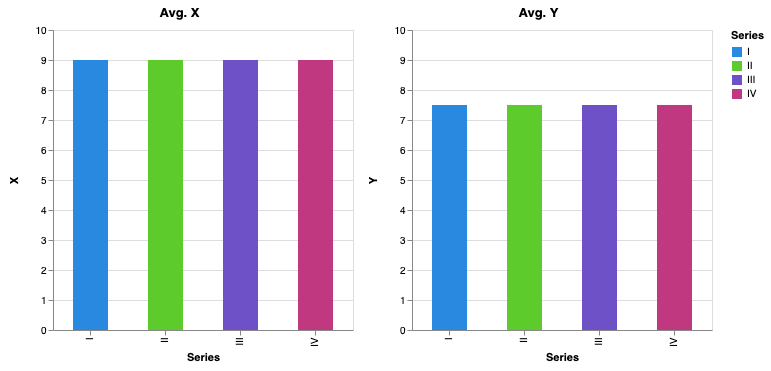

In [520]:
domain = ['I', 'II', 'III', 'IV']

avg_x = alt.Chart(anscombe_means, width=300, title='Avg. X') \
           .mark_bar(size=35) \
           .encode(x=alt.X('Series:N'),
                   y=alt.Y('X', scale=alt.Scale(domain=(0, 9.5))),
                   color=alt.Color('Series', scale=alt.Scale(domain=domain,
                                                             range=color_list)),)

avg_y = alt.Chart(anscombe_means, width=300, title='Avg. Y') \
           .mark_bar(size=35) \
           .encode(x=alt.X('Series:N'),
                   y=alt.Y('Y', scale=alt.Scale(domain=(0, 10))),
                   color=alt.Color('Series', scale=alt.Scale(domain=domain,
                                                             range=color_list)),)

avg_x | avg_y

# Pie charts

Part charts should always represent part to whole relationships. 

## Part to whole violations

In [521]:
most_popular_lang = {'JavaScript': 67.8,
                      'HTML/CSS': 63.5,
                      'SQL': 54.4,
                      'Python': 41.7,
                      'Java': 41.1,
                      'Bash/Shell': 36.6}

In [522]:
stack_pop_lang = pd.DataFrame.from_dict(most_popular_lang, orient='index', columns=['percentage'])

In [523]:
stack_pop_lang['plot_val'] = stack_pop_lang['percentage'] / stack_pop_lang['percentage'].sum()*100

In [524]:
stack_pop_lang['colors'] = ['#EA9C4B','#A5B64A','#4FC288','#28BFCD','#9EACE5','#F48FBE']

In [525]:
stack_pop_lang['angle'] = stack_pop_lang['plot_val']/stack_pop_lang['plot_val'].sum() * 2*pi

In [526]:
pie_source = ColumnDataSource(stack_pop_lang)

pie = figure(plot_height=350, title="Most popular languages", toolbar_location=None, x_range=(-0.5, 1.0))

pie.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='colors', source=stack_pop_lang, legend='index')

pie.axis.axis_label=None
pie.axis.visible=False
pie.grid.grid_line_color = None

show(pie)

The chart above violates the principle of the part to whole relationship. Each of the slices represents an item that is not mutually exclusive. Therefore, the sum of its part go well beyond 100%

## Area + angle difficult to interpret

In [527]:
perc_pie = {'JavaScript': 28,
                'HTML/CSS': 25,
                'SQL': 23,
                'Python': 21,
                'Java': 3}

In [528]:
perc_pie_df = pd.DataFrame.from_dict(perc_pie, orient='index', columns=['percentage'])

In [529]:
lang_colors = ['#EA9C4B','#4FC288','#28BFCD','#9EACE5','#F48FBE']
perc_pie_df['angle'] = perc_pie_df['percentage']/perc_pie_df['percentage'].sum() * 2*pi
perc_pie_df['colors'] = lang_colors

In [530]:
pie_perc_source = ColumnDataSource(perc_pie_df)

pie_perc_plot = figure(plot_height=350, title="Most popular languages in Company", toolbar_location=None, x_range=(-0.5, 1.0))

pie_perc_plot.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='colors', source=pie_perc_source, legend='index')

pie_perc_plot.axis.axis_label=None
pie_perc_plot.axis.visible=False
pie_perc_plot.grid.grid_line_color = None

show(pie_perc_plot)


If we don't have any extra information is very difficult to know if JavaScript is more popular than HTML and if SQL is more popular than Python.

In [531]:
perc_bar_df = perc_pie_df.reset_index().rename(columns={'index': 'language'})

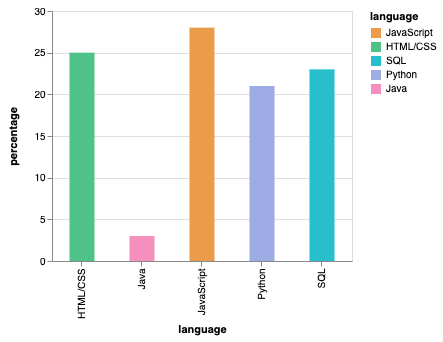

In [532]:
alt.Chart(perc_bar_df, height=250, width=300) \
    .mark_bar(size=25)\
    .encode(
            x=alt.X('language:N'),
            y=alt.Y('percentage:Q', scale=alt.Scale(domain=(0, 30))),
            color=alt.Color('language',
 scale=alt.Scale(domain=perc_bar_df.language.tolist(),
                                            range=lang_colors)),
)

Using a bar chart makes this comparison simpler. Here we can easily see that JavaScript is more popular than HTML and that SQL is more popular than Python.

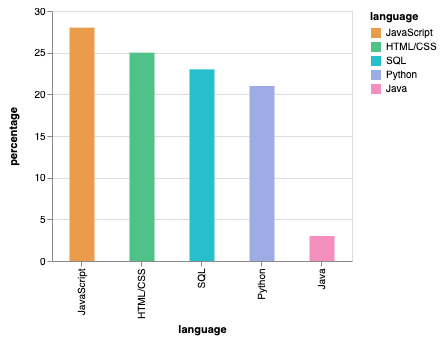

In [533]:
alt.Chart(perc_bar_df, height=250, width=300) \
    .mark_bar(size=25)\
    .encode(
            x=alt.X('language:N', sort=None),
            y=alt.Y('percentage:Q', scale=alt.Scale(domain=(0, 30))),
            color=alt.Color('language',
                            scale=alt.Scale(domain=perc_bar_df.language.tolist(),
                                            range=lang_colors)),
)

We can even order the bars so it is easy to see the ranking between items.

# Truncated bar charts

In [534]:
#percentage hispanic/latino devs
lat_devs = {
    '2017': 5.6,
    '2018': 6.7,
    '2019': 7.1
}

In [535]:
lat_survey = pd.DataFrame.from_dict(lat_devs, orient='index', columns=['percentage']) \
            .reset_index() \
            .rename(columns={'index': 'year'})

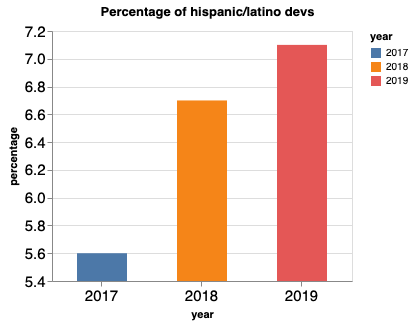

In [536]:
alt.Chart(lat_survey, height=250, width=300, title='Percentage of hispanic/latino devs') \
    .mark_bar(size=50) \
    .encode(
        x='year:N',
        y=alt.Y('percentage:Q', scale=alt.Scale(domain=(5.5, 7.20))),
        color='year',
    ).configure_axis(
    labelFontSize=15,
    labelAngle=0
)

The graph above shows a truncated y axis that starts at 5.4. This gives the impression that in 2018 there was a lot of growth.

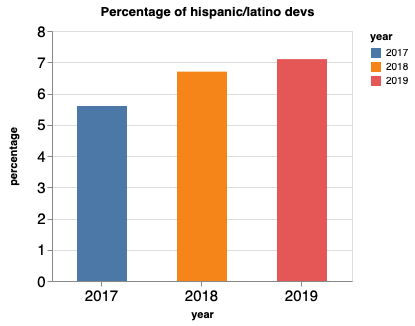

In [537]:
alt.Chart(lat_survey, height=250, width=300, title='Percentage of hispanic/latino devs') \
    .mark_bar(size=50) \
    .encode(
        x='year:N',
        y=alt.Y('percentage:Q'),
        color='year',
    ).configure_axis(
    labelFontSize=15,
    labelAngle=0
)

Same data is plotted here starting at 0.

# Not always truncate axis

This section uses data from the Berkeley Eart dataset. You can find the data [here](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).

In [538]:
temperature_data = pd.read_csv('./datasets/GlobalTemperatures.csv', parse_dates=['dt'])

In [539]:
plot_data = temperature_data[temperature_data['dt'] > '1879']\
                .groupby(pd.Grouper(freq='Y', key='dt'))['LandAverageTemperature'] \
                .mean() \
                .reset_index()

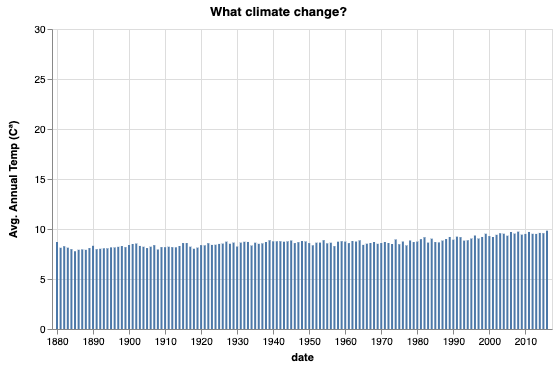

In [540]:
alt.Chart(plot_data, height=300, width=500, title='What climate change?') \
    .mark_bar(size=2) \
    .encode(
    x=alt.X('dt', title='date'),
    y=alt.Y('LandAverageTemperature',
            scale=alt.Scale(domain=(0, 30)),
            title='Avg. Annual Temp (Cª)')
)

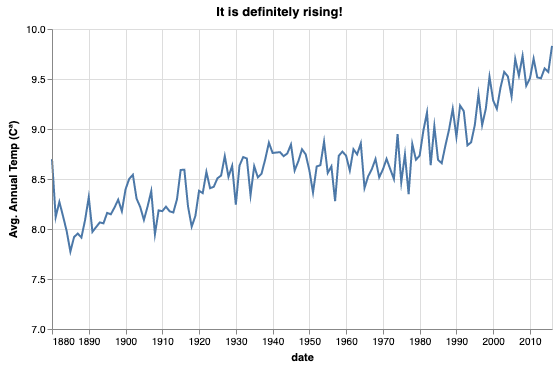

In [541]:
alt.Chart(plot_data, height=300, width=500, title='It is definitely rising!') \
    .mark_line(size=2) \
    .encode(
    x=alt.X('dt', title='date'),
    y=alt.Y('LandAverageTemperature',
            scale=alt.Scale(domain=(7, 10)),
            title='Avg. Annual Temp (Cª)')
)

## Use of color

This section uses the data from Seattle's ride sharing system. You can find it [here](https://www.kaggle.com/pronto/cycle-share-dataset).

In [542]:
bike_trips = pd.read_csv('./datasets/trip.csv', parse_dates=['starttime', 'stoptime'])

In [543]:
from_to_trips = bike_trips.groupby(['from_station_name',
                                    'to_station_name']) \
                            .size() \
                            .reset_index() \
                            .rename(columns={0: 'counts'})

In [544]:
top_trips = from_to_trips.sort_values(by='counts', ascending=False).iloc[:25,]

In [545]:
matrix_data = from_to_trips[(from_to_trips.from_station_name.isin(top_trips.from_station_name.tolist())) &
             (from_to_trips.to_station_name.isin(top_trips.to_station_name.tolist()))].copy()

In [546]:
matrix_data['log_counts'] = np.log(matrix_data.counts)

In [547]:
number_station = {station: number for number, station in enumerate(set(top_trips.from_station_name.append(top_trips.to_station_name)))}

In [548]:
matrix_data[['from_station_number', 'to_station_number']] = matrix_data[['from_station_name', 'to_station_name']].applymap(lambda x: number_station[x])


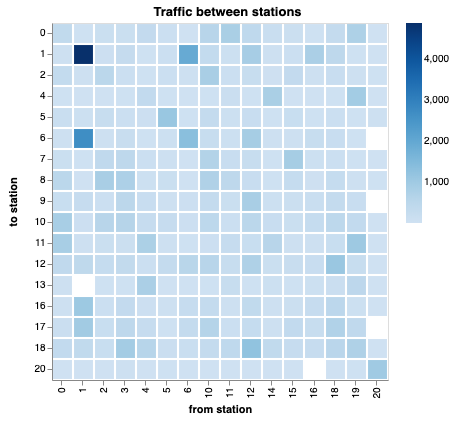

In [549]:
alt.Chart(matrix_data, title='Traffic between stations') \
    .mark_bar() \
    .encode(
    x=alt.X('from_station_number:O', title='from station'),
    y=alt.Y('to_station_number:O', title='to station'),
    tooltip=['from_station_name', 'to_station_name', 'counts'],
    color=alt.Color('counts:Q', title='')
    )

Above color is used to convey magnitude. The darker the blue, the more trips between both stations.

In [550]:
# Using a different color scale
category_color10 = ['#1f77b4', '#ff7f0e', '#2ca02c',
                    '#d62728', '#9467bd', '#8c564b',
                    '#e377c2', '#7f7f7f', '#bcbd22',
                    '#17becf']

In [551]:
matrix_data['count_cuts'] = pd.cut(matrix_data.counts, 20)

In [552]:
matrix_data['left_interval_cut'] = matrix_data.count_cuts.apply(lambda x: x.left)
matrix_data['right_interval_cut'] = matrix_data.count_cuts.apply(lambda x: x.right)

In [553]:
matrix_data['count_cuts_str'] = [f'{x}-{y}' for x, y in zip(matrix_data.left_interval_cut,
                                    matrix_data.right_interval_cut)]

In [554]:
bin_to_color = {bin_range: color for bin_range, color
                 in zip(np.sort(matrix_data['count_cuts_str'].unique()), category_color10)}

In [555]:
matrix_data['color_bin'] = matrix_data['count_cuts_str'].map(bin_to_color)

In [556]:
color_bar_identity = matrix_data[['left_interval_cut', 'right_interval_cut', 'color_bin']] \
                            .drop_duplicates() \
                            .sort_values(by='left_interval_cut')

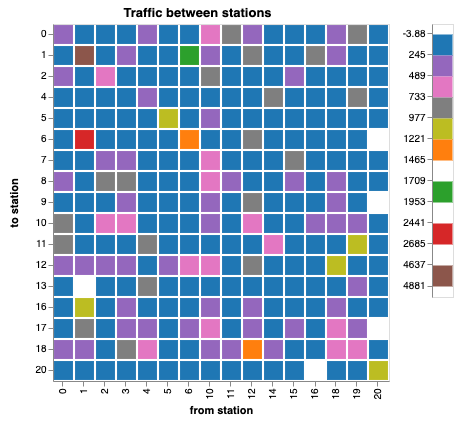

In [557]:
colored_matrix = alt.Chart(matrix_data.loc[:, ['from_station_number',
                                          'to_station_number',
                                          'from_station_name',
                                          'to_station_name',
                                          'counts',
                                          'color_bin']], title='Traffic between stations') \
                .mark_bar() \
                .encode(
                x=alt.X('from_station_number:O', title='from station'),
                y=alt.Y('to_station_number:O', title='to station'),
                tooltip=['from_station_name', 'to_station_name', 'counts'],
                color=alt.Color('color_bin', scale=None)
                )

colored_bar = alt.Chart(color_bar_identity) \
    .mark_bar() \
    .encode(
        y=alt.Y('left_interval_cut', title=''),
        y2='right_interval_cut',
        color=alt.Color('color_bin', scale=None)
)

colored_matrix | colored_bar

Here we try to do the same but using color hue for that purpose. The end result is more difficult to understand.

In [558]:
origin_station_freq = bike_trips.groupby('from_station_name').size().sort_values(ascending=False)

In [559]:
# Top 10 stations by origin
top_10_origin_stations = origin_station_freq[:10].reset_index().rename(columns={0: 'counts'})

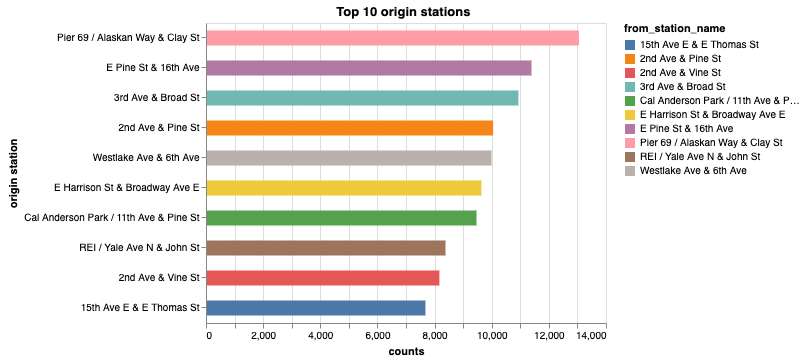

In [560]:
alt.Chart(top_10_origin_stations,
          width=400,
          height=300,
          title='Top 10 origin stations') \
    .mark_bar(size=15) \
    .encode(
        x=alt.X('counts'),
        y=alt.Y('from_station_name',
                sort=alt.EncodingSortField(field='counts',
                                           op='sum',
                                           order='descending'),
               title='origin station'),
        color='from_station_name'
)

Here color is being used to identify each station.

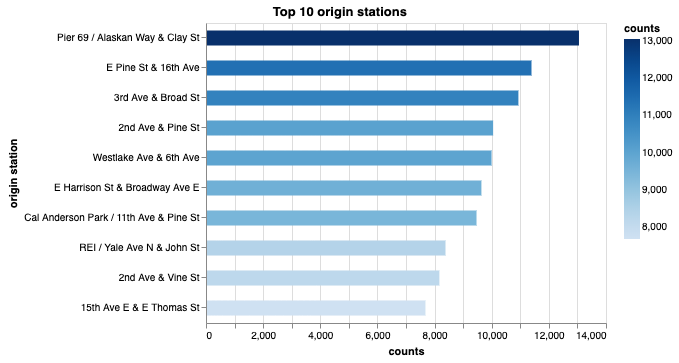

In [561]:
alt.Chart(top_10_origin_stations,
          width=400,
          height=300,
          title='Top 10 origin stations') \
    .mark_bar(size=15) \
    .encode(
        x=alt.X('counts'),
        y=alt.Y('from_station_name',
                sort=alt.EncodingSortField(field='counts',
                                           op='sum',
                                           order='descending'),
               title='origin station'),
        color='counts'
)

In this case, instead of identifying, here color is being used to reveal magnitude. 

In [565]:
bike_trips['year'] = bike_trips.starttime.dt.year

In [566]:
usage_origin_stations_year = bike_trips.groupby(['from_station_name', 'year']) \
                                        .size() \
                                        .reset_index() \
                                        .rename(columns={0: 'counts'})

In [567]:
yearly_evolution_top_10_origin_stations = usage_origin_stations_year[usage_origin_stations_year.from_station_name \
                                                                        .isin(top_10_origin_stations.from_station_name.tolist())]


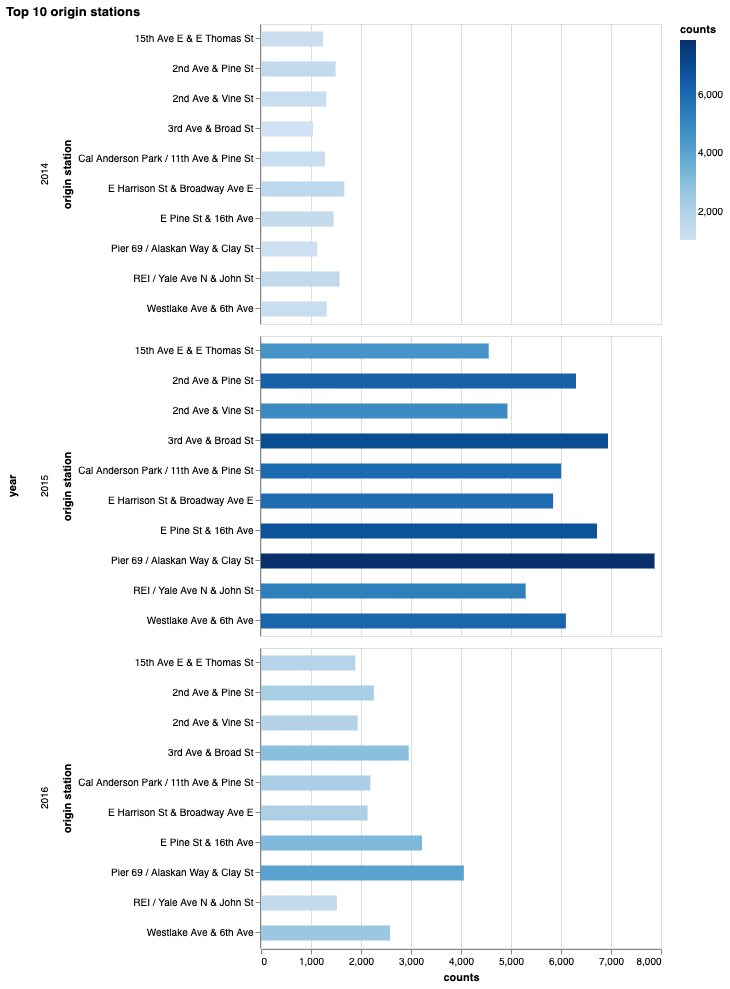

In [568]:
alt.Chart(yearly_evolution_top_10_origin_stations,
          width=400,
          height=300,
          title='Top 10 origin stations') \
    .mark_bar(size=15) \
    .encode(
        x=alt.X('counts'),
        y=alt.Y('from_station_name',
               title='origin station',
               sort=None),
        color='counts',
    row='year:O'
)

Here again color is used to reveal magnitude however it makes comparison between specific stations a bit more difficult. Also, it is more difficult to refer to a particular station.